In [1]:
import numpy as np
#0,2,6,7,9,14,15,16,17,18
list = []
list1 = []
with open('C:\RUTGERS\Analytics\BDIdea1DataV6.csv') as f:
    for line in f:
        ele = line.split(',')
        if len(ele) is 19:
            list.append(np.delete(line.split(','), [0,2,6,7,9,14,15,16,17,18]).tolist())

print (list[0])
print (list[1])
print (list[2])

['Gender', 'Age', 'LifetimeDuration', 'MonthJoined', 'Day0Value', 'CLV', 'LifetimeTx', 'Food', 'Source']
['F', '65', '291', 'January', '$37.19 ', '$37.19 ', '1', 'ham', 'facebook']
['F', '63', '291', 'January', '$37.19 ', '$136.02 ', '5', 'ham', 'facebook']


In [2]:
class_train = []
for ele in list:
    if ele[4] == ele[5]:
        class_train.append(0)
    else:
        class_train.append(1)

In [3]:
del list[0]
del class_train[0]

In [4]:
from sklearn.preprocessing import OneHotEncoder

print (list[0])
print (list[0][4])

for idx, i in enumerate(list):
    if i[4] == 'NULL':
        list[idx][4] = 0
    else:
        list[idx][4] = i[4].replace('$','')
    
print (list[0])
print (list[1])    

gender = ['F','M','NULL']
MonthJoined = ['January','February','March','April','May','June','July','August','September','October', 'NULL']
food = ['ham', 'bacon', 'pita', 'salmon', 'jello', 'dahlia', 'Figs', 'dates', 'lime', 'scallops', 'home', 'cosmos', 'donut', 'parsley', 'jalapeno', 'Wasabi', 'almond', 'prunes', 'eggs', 'Oregano', 'rebecca', 'roses', 'pricklypear', 'cb', 'iceberg', 'potato', 'blueberry', 'aster', 'jennifer', 'beef', 'elizabeth', 'daisy', 'brittany', 'shaquandria', 'margie', 'ilene', 'mustard', 'sugar', 'lorraine', 'lemongrass', 'pretzel', 'jazmine', 'freshberry', 'michelle', 'khadeejah', 'guava', 'plums', 'yambean', 'tsdsugar', 'bread', 'artichoke', 'gnocchi', 'Acorn', 'ziti', 'Shawarma', 'raspberry','plum','NULL']
source = ['facebook', 'NULL', 'bing', 'AdWords', 'fb', 'affiliate', 'pinterest', 'retargeting', 'google', 'beyonddiet', 'ginger', 'youtube', 'thrivefacebook']

final = []

for ele in list:
    gen = ele[0]
    mon = ele[3]
    foo = ele[7]
    sou = ele[8]
    if ele[1] == 'NULL':
        ele[1] = 0
    if ele[2] == 'NULL':
        ele[2] = 0
    if ele[4] == 'NULL':
        ele[4] = 0
    final.append([gender.index(gen), int(ele[1]), int(ele[2]), MonthJoined.index(mon), float(ele[4]), food.index(foo), source.index(sou)])
    
f = open('ruth_final.txt','w+')
for ele,ele2 in zip(final,class_train):
    f.write(','.join(str(x) for x in ele)+','+str(ele2)+'\n')
    
f2 = open('ruth_raw.txt','w+')
for ele,ele2 in zip(list,class_train):
    f2.write(','.join(str(x) for x in ele)+','+str(ele2)+'\n')
    
print (final[0])
print (final[1])


['F', '65', '291', 'January', '$37.19 ', '$37.19 ', '1', 'ham', 'facebook']
$37.19 
['F', '65', '291', 'January', '37.19 ', '$37.19 ', '1', 'ham', 'facebook']
['F', '63', '291', 'January', '37.19 ', '$136.02 ', '5', 'ham', 'facebook']
[0, 65, 291, 0, 37.19, 0, 0]
[0, 63, 291, 0, 37.19, 0, 0]


In [5]:
from sklearn.model_selection import train_test_split
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(final, class_train, test_size=0.2)

c = Counter(y_train)
print (c.most_common())

c = Counter(y_test)
print (c.most_common())


print (len(y_train))
print (len(y_test))

[(0, 20540), (1, 13024)]
[(0, 5136), (1, 3255)]
33564
8391


In [6]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy: 0.612084376117
             precision    recall  f1-score   support

       Once       0.65      0.78      0.71      5136
   Multiple       0.50      0.34      0.41      3255

avg / total       0.59      0.61      0.59      8391

Confusion matrix, without normalization
[[4026 1110]
 [2145 1110]]


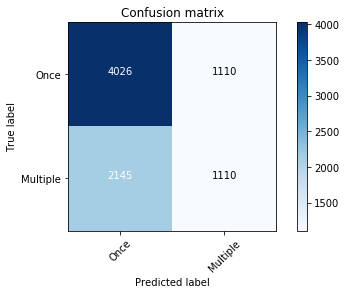

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

from sklearn.naive_bayes import BernoulliNB


class_names = ['Once','Multiple']
#print len(X_train)
#print len(y_train)

clf = BernoulliNB()
clf.fit(X_train, y_train)

pred = clf.predict(np.array(X_test))
proba = clf.predict_proba(np.array(X_test))

score = []
for ele in proba:
    score.append(ele[1])

from sklearn.metrics import accuracy_score
print ('Accuracy: '+str(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred, target_names=class_names))


cnf_matrix = confusion_matrix(y_test, pred)


%matplotlib inline
# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.figure()

#Plotting Precision-Recall Curve

#precision, recall, _ = precision_recall_curve(y_test, pred)
#print (precision)
#print (recall)
#plt.plot(recall, precision, color='b', alpha=0.2)
#plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')

#plt.xlabel('Recall')
#plt.ylabel('Precision')
#plt.ylim([0.0, 1.05])
#plt.xlim([0.0, 1.0])
#plt.figure

Accuracy: 0.691931831724
             precision    recall  f1-score   support

       Once       0.72      0.80      0.76      5136
   Multiple       0.62      0.52      0.57      3255

avg / total       0.69      0.69      0.69      8391

Confusion matrix, without normalization
[[4122 1014]
 [1571 1684]]


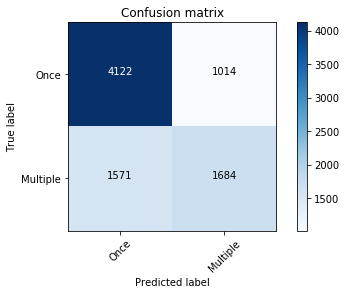

In [8]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(n_estimators=10)

clf2.fit(X_train, y_train)

pred2 = clf2.predict(np.array(X_test))
proba2 = clf2.predict_proba(np.array(X_test))

score2 = []
for ele in proba2:
    score2.append(ele[1])


print ('Accuracy: '+str(accuracy_score(y_test, pred2)))
print(classification_report(y_test, pred2, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, pred2)

%matplotlib inline
# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.figure()

#Plotting Precision-Recall Curve
#precision, recall, _ = precision_recall_curve(y_test, pred2)
#plt.step(recall, precision, color='b', alpha=0.2,
        # where='post')
#plt.fill_between(recall, precision, step='post', alpha=0.2,
                 #color='b')

#plt.xlabel('Recall')
#plt.ylabel('Precision')
#plt.ylim([0.0, 1.05])
#plt.xlim([0.0, 1.0])
#plt.figure

Accuracy: 0.716243594327
             precision    recall  f1-score   support

       Once       0.72      0.88      0.79      5136
   Multiple       0.70      0.46      0.56      3255

avg / total       0.71      0.72      0.70      8391

Confusion matrix, without normalization
[[4502  634]
 [1747 1508]]


<function matplotlib.pyplot.figure>

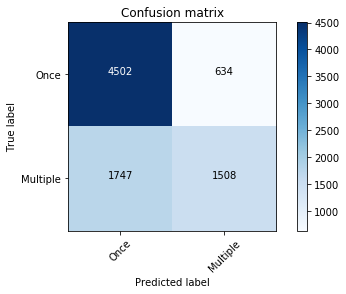

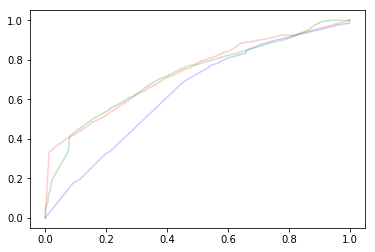

In [9]:
from sklearn.svm import SVC

clf3 = SVC(probability=True)

clf3.fit(X_train, y_train)

pred3 = clf3.predict(np.array(X_test))
proba3 = clf3.predict_proba(np.array(X_test))

score3 = []
for ele in proba3:
    score3.append(ele[1])

print ('Accuracy: '+str(accuracy_score(y_test, pred3)))
print(classification_report(y_test, pred3, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, pred3)

%matplotlib inline
# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.figure()

"""
#Plotting Precision-Recall Curve

precision, recall, _ = precision_recall_curve(y_test, pred3)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.figure
"""

fpr, tpr, thresholds = roc_curve(y_test, score)
plt.plot(fpr,tpr,color='b', alpha=0.2, label= 'Naive')

fpr2, tpr2, thresholds2 = roc_curve(y_test, score2)
plt.plot(fpr2,tpr2,color='r', alpha=0.2, label= 'RF')

fpr3, tpr3, thresholds3 = roc_curve(y_test, score3)
plt.plot(fpr3,tpr3,color='g', alpha=0.2, label= 'SVC')

plt.figure